# PROBLEM

**Import the CSV file 'College.csv' and do the following analytics:**

**a) Find all private schools with a graduation rate of higher than 90%.**

**b) Using all attributes from the initial dataset except for the Private attribute, do
the K-mean clustering method with two clusters. After this step, we will split
the original data into two groups (private or not).**

**c) Add the predicted cluster as a new attribute for each observation. Using the
new attribute to analyze the new data to see how well K-mean clustering
method can detect a private school in comparison with the Private label.**

In [1]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
data = pd.read_csv('College.csv')
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
data.shape

(777, 19)

In [4]:
data.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

*a) Find all private schools with a graduation rate of higher than 90%.*

In [5]:
#take all private school in data frame
private_school = data[data.Private == 'Yes']
private_school.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
#Rename of column to bug error
private_school.rename(columns={'Grad.Rate':'GradRate'},inplace=True)
private_school.head()

/home/minhvu/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,GradRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
# take all private shool have graduation higher than 90%
private_school.loc[private_school.GradRate >=90,'PriSch_GradHigher90'] ='Yes'
private_school.loc[private_school.GradRate <90,'PriSch_GradHigher90'] ='No'
private_school.head()

/home/minhvu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/minhvu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/minhvu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,GradRate,PriSch_GradHigher90
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,No
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No


In [8]:
private_sch_dfthan90=private_school[private_school.PriSch_GradHigher90 == 'Yes']
private_sch_dfthan90.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,GradRate,PriSch_GradHigher90
16,Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100,Yes
37,Barnard College,Yes,2496,1402,531,53,95,2121,69,17926,8124,600,850,83,93,10.3,33,12580,91,Yes
60,Bowdoin College,Yes,3356,1019,418,76,100,1490,8,19030,5885,1495,875,93,96,11.2,52,20447,96,Yes
70,Brown University,Yes,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97,Yes
72,Bucknell University,Yes,6548,3813,862,49,85,3316,31,18550,4750,800,1200,95,97,14.2,36,13675,93,Yes


In [9]:
private_sch_dfthan90.shape

(70, 20)

*b) Using all attributes from the initial dataset except for the Private attribute, do the K-mean clustering method with two clusters. After this step, we will split the original data into two groups (private or not).*
---


In [10]:
#move Private column to end
cols_at_end = ['Private']
data = data[[c for c in data if c not in cols_at_end] 
        + [c for c in cols_at_end if c in data]]

In [11]:
data.head()

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,Yes
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,Yes
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,Yes
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,Yes


3. Define your target and predictors.

In [12]:
X = data.iloc[:,1:18]
y = data.iloc[:,18]

4. Let’s have a look at our data through a scatter plot.

/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


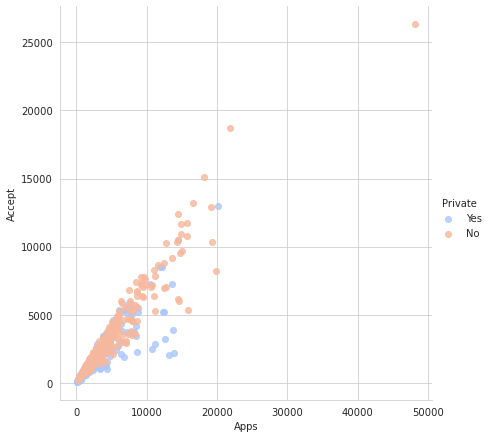

In [13]:
sns.set_style('whitegrid')
sns.lmplot('Apps','Accept',data=data, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


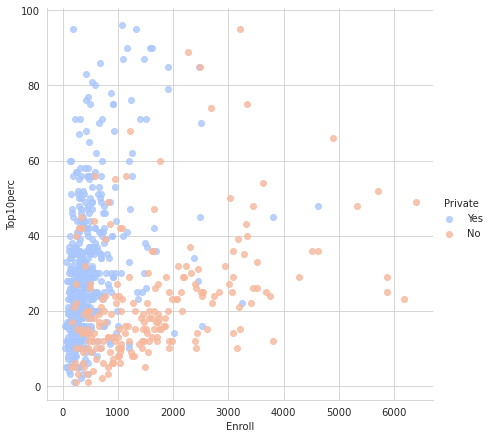

In [14]:
sns.set_style('whitegrid')
sns.lmplot('Enroll','Top10perc',data=data, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

5. Now, let’s instantiate and fit our K means cluster model. We are going to use three clusters and a random state of 21.

In [15]:
km = KMeans(n_clusters = 2, n_jobs = 4, random_state=21)
km.fit(X)

/home/minhvu/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=4, random_state=21)

6. With the following code you can identify the center points of the data.

In [16]:
centers = km.cluster_centers_
print(centers)

[[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.51195815e+01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]]


7. Now, let’s compare our original data versus our clustered results using the following code.

In [17]:
data['Cluster'] = km.labels_

/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


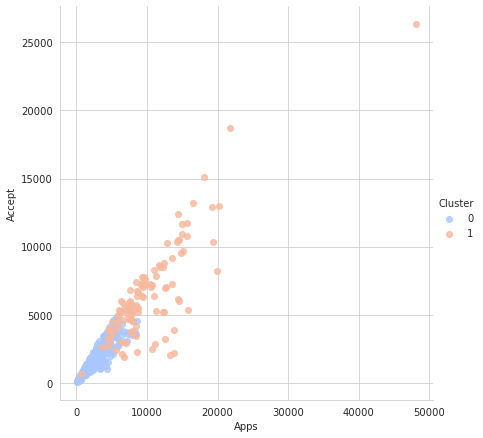

In [18]:
sns.set_style('whitegrid')
sns.lmplot('Apps','Accept',data=data, hue='Cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/minhvu/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


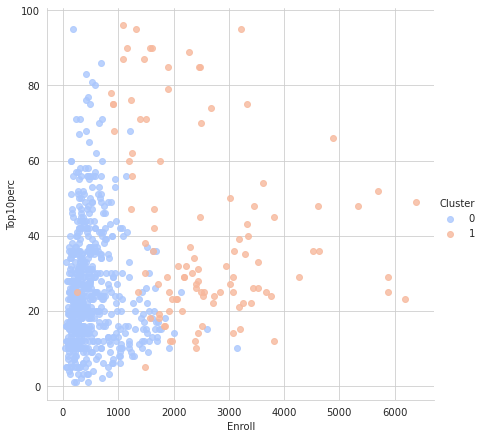

In [19]:
sns.set_style('whitegrid')
sns.lmplot('Enroll','Top10perc',data=data, hue='Cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

Evaluation

Câu C

In [20]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [21]:
data['PrivateConverter'] = data['Private'].apply(converter)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['PrivateConverter'],data['Cluster']))
print(classification_report(data['PrivateConverter'],data['Cluster']))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

